In [1]:
import pandas as pd
import numpy as np
import newSom
import optimizeW_Kfolder_CM
import dataset_read
import matplotlib.pyplot as plt

In [2]:
dataread = dataset_read.DATAREAD()

In [3]:
csv_training = pd.read_csv("Crowdsourced Mapping/training.csv")
csv_test = pd.read_csv("Crowdsourced Mapping/testing.csv")
dataread.stringToIntCrowdsourcedMappingDataSet(csv_training,"class")
dataread.stringToIntCrowdsourcedMappingDataSet(csv_test,"class")

In [9]:
def RunTest(minfeature = 29, neuron_unit_num_min = 6):  
    feature_nums = []
    betterscores = []
    betterscores_test = []
    all_train_score_W1_average =[]
    all_train_score_W_combine_average =[]
    test_score_W1_average = []
    test_score_W_combine_average  = []
    cross_v = False
    # as som must predict data set that must two dimension, so dim should be larger than 2 , so start from 3
    for i in range(29,30):
        som = newSom.SOM(m= neuron_unit_num_min, n= neuron_unit_num_min, dim=i-1)  # dim = i-1, as the first feature is the class label
        optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,i-1,csv_training,Y = csv_test,classNum =6,k_folder_num_max = 15,subset_percentage = 0.5,cross_validation = cross_v)
        print("feature number :{}".format(i-1))
        a, b, c = optimize_W1.runOptimize()
        feature_nums.append(a)
        betterscores.append(b)
        betterscores_test.append(c)
        all_train_score_W1_average.append(np.average(optimize_W1.all_train_score_W1))
        all_train_score_W_combine_average.append(np.average(optimize_W1.all_train_score_W_Combined))
        test_score_W1_average.append(np.average(optimize_W1.test_score_W1))
        test_score_W_combine_average.append(np.average(optimize_W1.test_score_W_combined))

    if(cross_v == False):
        plt.plot(feature_nums,all_train_score_W1_average,'r',label ='all_train_score_W1_average')
        plt.plot(feature_nums,all_train_score_W_combine_average,'c',label ='all_train_score_W_combine_average')
        plt.plot(feature_nums,test_score_W1_average,'y',label ='test_score_W1_average')
        plt.plot(feature_nums,test_score_W_combine_average,'k',label ='test_score_W_combine_average')

    else:
        plt.plot(feature_nums,betterscores,'g',label ='betterscores_train')
        plt.plot(feature_nums,betterscores_test,'b',label ='betterscores_test')
        plt.ylabel("BetterScore")
        plt.xlabel("Feature Number ")

    plt.legend()
    plt.show()


neuron unit number: 12
right_data_score_W1 1.0
error_data_score_W3 0.6027346637102735
error_data_score_W1 0.5949741315594974
all_train_score_W1_average : 0.7433854907539118
all_train_score_W_combine_average : 0.7518255097202465
test_score_W1_average : 0.39
test_score_W_combine_average : 0.47333333333333333
betterScoreList_train: []
betterScoreList_test: [0.08333333333333331]
neuron unit number: 30
right_data_score_W1 1.0
error_data_score_W3 0.5632411067193676
error_data_score_W1 0.6971343873517787
all_train_score_W1_average : 0.8080606922712186
all_train_score_W_combine_average : 0.7919393077287814
test_score_W1_average : 0.45666666666666667
test_score_W_combine_average : 0.47333333333333333
betterScoreList_train: []
betterScoreList_test: [0.016666666666666663]
neuron unit number: 36
right_data_score_W1 1.0
error_data_score_W3 0.6569669837716844
error_data_score_W1 0.5758254057078903
all_train_score_W1_average : 0.8305357989568516
all_train_score_W_combine_average : 0.8063537221431958


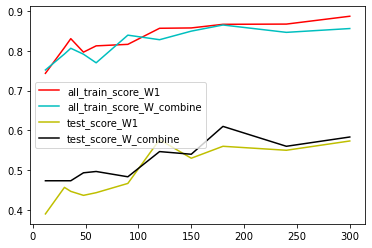

In [5]:
max_num = [2,5,6,8,10,15,20,25,30,40,50]
unit_list = []
for x in max_num:
    unit_list.append(6*x)
all_train_score_W1_average =[]
all_train_score_W_combine_average =[]
test_score_W1_average = []
test_score_W_combine_average  = []

for x in max_num:
    print("neuron unit number: {}".format(6*x))
    print("*******************\n")
    som = newSom.SOM(m= 6, n= x, dim=28)  # dim = i-1, as the first feature is the class label
    optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,28,csv_training,Y = csv_test,classNum =6,k_folder_num_max = 15,subset_percentage = 0.5,cross_validation = False)
    a, b, c = optimize_W1.runOptimize()
    all_train_score_W1_average.append(np.average(optimize_W1.all_train_score_W1))
    all_train_score_W_combine_average.append(np.average(optimize_W1.all_train_score_W_Combined))
    test_score_W1_average.append(np.average(optimize_W1.test_score_W1))
    test_score_W_combine_average.append(np.average(optimize_W1.test_score_W_combined))

plt.plot(unit_list,all_train_score_W1_average,'r',label ='all_train_score_W1')
plt.plot(unit_list,all_train_score_W_combine_average,'c',label ='all_train_score_W_combine')
plt.plot(unit_list,test_score_W1_average,'y',label ='test_score_W1')
plt.plot(unit_list,test_score_W_combine_average,'k',label ='test_score_W_combine')
plt.legend()
plt.show()

k number :3

validate_score_W1_average : 0.8150256118383609
validate_score_W2_average : 0.79491557579207
test_score_W1_average : 0.3944444444444444
test_score_W2_average : 0.4266666666666667
k number :4

validate_score_W1_average : 0.8390380384862349
validate_score_W2_average : 0.8366670217942774
test_score_W1_average : 0.4
test_score_W2_average : 0.41583333333333333
k number :5

validate_score_W1_average : 0.8680265654648955
validate_score_W2_average : 0.8399430740037952
test_score_W1_average : 0.43866666666666665
test_score_W2_average : 0.4086666666666666
k number :6

validate_score_W1_average : 0.8468474512839195
validate_score_W2_average : 0.8386914971635315
test_score_W1_average : 0.43111111111111117
test_score_W2_average : 0.41333333333333333
k number :7

validate_score_W1_average : 0.8672526473760077
validate_score_W2_average : 0.8708548813762512
test_score_W1_average : 0.42857142857142855
test_score_W2_average : 0.41380952380952385
k number :8

validate_score_W1_average : 0.876

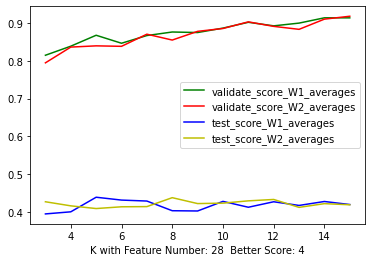

(28, 4)

In [6]:
global keepFeatureColumns1 
keepFeatureColumns1 = [1,4,5,9,10,15,17,22,24,27]
som = newSom.SOM(m=6, n=6, dim=len(keepFeatureColumns1))  # dim = i-1, as the first feature is the class label
optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num_max =15,subset_percentage = 0.1,keepFeatureColumns = keepFeatureColumns1)
optimize_W1.runOptimize()

neuron unit number: 12
*******************

right_data_score_W1 1.0
error_data_score_W3 0.6702434997936443
error_data_score_W1 0.6471316549731737
all_train_score_W1_average : 0.7702228544333808
all_train_score_W_combine_average : 0.7668089141773352
test_score_W1_average : 0.3933333333333333
test_score_W_combine_average : 0.4633333333333333
betterScoreList_train: []
betterScoreList_test: [0.07]
neuron unit number: 30
*******************

right_data_score_W1 1.0
error_data_score_W3 0.6041366041366041
error_data_score_W1 0.5873015873015873
all_train_score_W1_average : 0.8028449502133712
all_train_score_W_combine_average : 0.7824561403508772
test_score_W1_average : 0.46
test_score_W_combine_average : 0.43666666666666665
betterScoreList_train: []
betterScoreList_test: []
neuron unit number: 36
*******************

right_data_score_W1 1.0
error_data_score_W3 0.633130081300813
error_data_score_W1 0.6295731707317073
all_train_score_W1_average : 0.8133712660028449
all_train_score_W_combine_aver

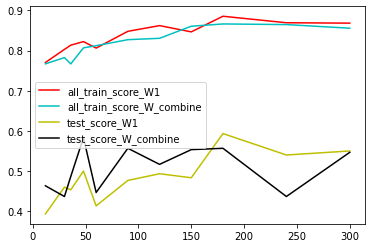

In [4]:
max_num = [2,5,6,8,10,15,20,25,30,40,50]
unit_list = []
for x in max_num:
    unit_list.append(6*x)
all_train_score_W1_average =[]
all_train_score_W_combine_average =[]
test_score_W1_average = []
test_score_W_combine_average  = []

for x in max_num:
    print("neuron unit number: {}".format(6*x))
    print("*******************\n")
    som = newSom.SOM(m= 6, n= x, dim=28)  # dim = i-1, as the first feature is the class label
    optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,28,csv_training,Y = csv_test,classNum =6,k_folder_num_max = 15,subset_percentage = 0.5,cross_validation = False)
    a, b, c = optimize_W1.runOptimize()
    all_train_score_W1_average.append(np.average(optimize_W1.all_train_score_W1))
    all_train_score_W_combine_average.append(np.average(optimize_W1.all_train_score_W_Combined))
    test_score_W1_average.append(np.average(optimize_W1.test_score_W1))
    test_score_W_combine_average.append(np.average(optimize_W1.test_score_W_combined))

plt.plot(unit_list,all_train_score_W1_average,'r',label ='all_train_score_W1')
plt.plot(unit_list,all_train_score_W_combine_average,'c',label ='all_train_score_W_combine')
plt.plot(unit_list,test_score_W1_average,'y',label ='test_score_W1')
plt.plot(unit_list,test_score_W_combine_average,'k',label ='test_score_W_combine')
plt.legend()
plt.show()

feature number :28
right_data_score_W1 0.809071125873325
error_data_score_W3 0.37265711135611906
all_train_score_W1_average : 0.8279753437648174
all_train_score_W_combine_average : 0.8065433854907539
test_score_W1_average : 0.27666666666666667
test_score_W_combine_average : 0.26
betterScoreList_train: []
betterScoreList_test: []


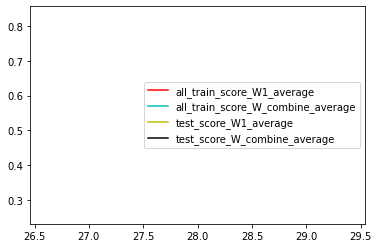

In [9]:
RunTest(neuron_unit_num_min = 500)

k number :3

validate_score_W1_average : 0.814646177195978
validate_score_W2_average : 0.8279263896793777
test_score_W1_average : 0.41444444444444445
test_score_W2_average : 0.4222222222222222
k number :4

validate_score_W1_average : 0.8637914527502714
validate_score_W2_average : 0.8438772160682766
test_score_W1_average : 0.44249999999999995
test_score_W2_average : 0.43083333333333335
k number :5

validate_score_W1_average : 0.8284629981024668
validate_score_W2_average : 0.8571157495256166
test_score_W1_average : 0.4286666666666667
test_score_W2_average : 0.404
k number :6

validate_score_W1_average : 0.8480849894704726
validate_score_W2_average : 0.8538742308129451
test_score_W1_average : 0.4183333333333334
test_score_W2_average : 0.4305555555555555
k number :7

validate_score_W1_average : 0.8620248321695028
validate_score_W2_average : 0.8524441074493357
test_score_W1_average : 0.40476190476190477
test_score_W2_average : 0.44333333333333336
k number :8

validate_score_W1_average : 0.8

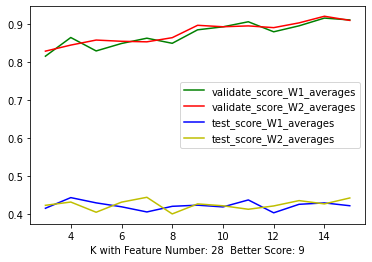

(28, 9)

In [7]:
global keepFeatureColumns1 
keepFeatureColumns1 = [1,4,5,10,17,22,24,27]  # only pick high better value
som = newSom.SOM(m=6, n=6, dim=len(keepFeatureColumns1))  # dim = i-1, as the first feature is the class label
optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num_max =15,subset_percentage = 0.1,keepFeatureColumns = keepFeatureColumns1)
optimize_W1.runOptimize()

k number :3

validate_score_W1_average : 0.8186302409409979
validate_score_W2_average : 0.8204325554923164
test_score_W1_average : 0.41111111111111115
test_score_W2_average : 0.44222222222222224
k number :4

validate_score_W1_average : 0.8666446271591999
validate_score_W2_average : 0.8438749125378282
test_score_W1_average : 0.44583333333333336
test_score_W2_average : 0.425
k number :5

validate_score_W1_average : 0.8274193548387097
validate_score_W2_average : 0.8478178368121443
test_score_W1_average : 0.42466666666666664
test_score_W2_average : 0.40066666666666667
k number :6

validate_score_W1_average : 0.8355570018440178
validate_score_W2_average : 0.845332953898691
test_score_W1_average : 0.4238888888888889
test_score_W2_average : 0.4138888888888889
k number :7

validate_score_W1_average : 0.8601283522767025
validate_score_W2_average : 0.8617442270153683
test_score_W1_average : 0.43142857142857144
test_score_W2_average : 0.44285714285714295
k number :8

validate_score_W1_average : 0

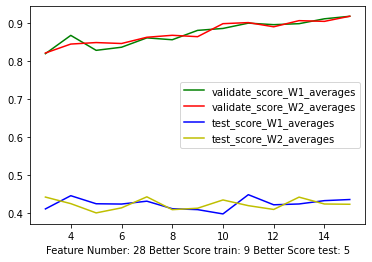

betterScoreList_train: [0.001802314551318518, 0.020398481973434635, 0.009775952054673187, 0.0016158747386658678, 0.011667562504104612, 0.01253480162398568, 0.0014119176199266503, 0.007976036993710522, 9.496676163334161e-05]
betterScoreList_test: [0.03111111111111109, 0.01142857142857151, 0.003703703703703709, 0.03666666666666668, 0.017948717948717885]


(28, 9)

In [4]:
global keepFeatureColumns1 
keepFeatureColumns1 = [1,4,5,10,17,22,24,27]  # only pick high better value
som = newSom.SOM(m=6, n=6, dim=len(keepFeatureColumns1))  # dim = i-1, as the first feature is the class label
optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num_max =15,subset_percentage = 0.1,keepFeatureColumns = keepFeatureColumns1)
optimize_W1.runOptimize()

k number :3

validate_score_W1_average : 0.8178713716562322
validate_score_W2_average : 0.8049705938152153
test_score_W1_average : 0.4155555555555555
test_score_W2_average : 0.43111111111111117
k number :4

validate_score_W1_average : 0.8687296821415922
validate_score_W2_average : 0.8464356105651424
test_score_W1_average : 0.4325
test_score_W2_average : 0.44
k number :5

validate_score_W1_average : 0.8367172675521821
validate_score_W2_average : 0.8446869070208729
test_score_W1_average : 0.43
test_score_W2_average : 0.42466666666666664
k number :6

validate_score_W1_average : 0.8424820622056735
validate_score_W2_average : 0.8506490903724293
test_score_W1_average : 0.4305555555555555
test_score_W2_average : 0.4461111111111111
k number :7

validate_score_W1_average : 0.8947740126347954
validate_score_W2_average : 0.8729324436158231
test_score_W1_average : 0.45095238095238094
test_score_W2_average : 0.4280952380952381
k number :8

validate_score_W1_average : 0.8591904135600407
validate_sco

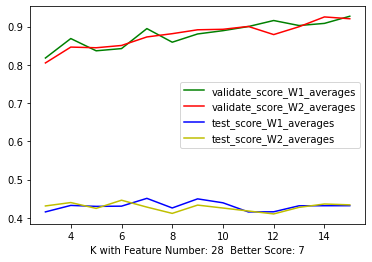

(28, 7)

In [8]:
global keepFeatureColumns1 
#reduce low value 1,3,8,9,14,21->0,2,7,8,13,20
keepFeatureColumns1 = [1,3,4,5,6,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27]  # only pick high better value
som = newSom.SOM(m=6, n=6, dim=len(keepFeatureColumns1))  # dim = i-1, as the first feature is the class label
optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num_max =15,subset_percentage = 0.1,keepFeatureColumns = keepFeatureColumns1)
optimize_W1.runOptimize()

k number :3

validate_score_W1_average : 0.8138873079112123
validate_score_W2_average : 0.8210965661164864
test_score_W1_average : 0.4477777777777778
test_score_W2_average : 0.41
k number :4

validate_score_W1_average : 0.863414033683374
validate_score_W2_average : 0.8540228639794064
test_score_W1_average : 0.4608333333333333
test_score_W2_average : 0.3941666666666667
k number :5

validate_score_W1_average : 0.8523719165085388
validate_score_W2_average : 0.8328273244781783
test_score_W1_average : 0.41133333333333333
test_score_W2_average : 0.42400000000000004
k number :6

validate_score_W1_average : 0.8458998370332532
validate_score_W2_average : 0.8559597708525915
test_score_W1_average : 0.44777777777777783
test_score_W2_average : 0.4183333333333334
k number :7

validate_score_W1_average : 0.8867020763646885
validate_score_W2_average : 0.8731299765342995
test_score_W1_average : 0.4142857142857143
test_score_W2_average : 0.42857142857142866
k number :8

validate_score_W1_average : 0.863

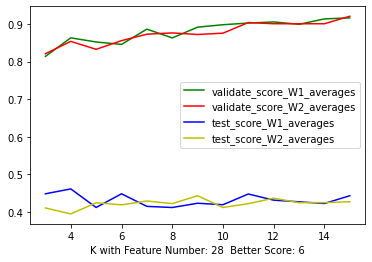

(28, 6)

In [9]:
global keepFeatureColumns1 
#reduce goes down value 1,3,7,8,9,12,13,14,20,21,24,26,27->0,2,6,7,8,11,12,13,19,20,23,25,26
keepFeatureColumns1 = [1,3,4,5,9,10,14,15,16,17,18,21,22,24,27] 
som = newSom.SOM(m=6, n=6, dim=len(keepFeatureColumns1))  # dim = i-1, as the first feature is the class label
optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num_max =15,subset_percentage = 0.1,keepFeatureColumns = keepFeatureColumns1)
optimize_W1.runOptimize()

k number :2

validate_score_W1_average : 0.7283729271079566
validate_score_W2_average : 0.7242947783977898
test_score_W1_average : 0.41833333333333333
test_score_W2_average : 0.365
k number :3

validate_score_W1_average : 0.8393094289508632
validate_score_W2_average : 0.7989944981976854
test_score_W1_average : 0.4266666666666667
test_score_W2_average : 0.43777777777777777
k number :4

validate_score_W1_average : 0.870336430621982
validate_score_W2_average : 0.8633200208469505
test_score_W1_average : 0.41333333333333333
test_score_W2_average : 0.46249999999999997
k number :5

validate_score_W1_average : 0.8872865275142315
validate_score_W2_average : 0.8717267552182163
test_score_W1_average : 0.44666666666666666
test_score_W2_average : 0.43466666666666665
k number :6

validate_score_W1_average : 0.8668737027159829
validate_score_W2_average : 0.8684825725841616
test_score_W1_average : 0.43555555555555564
test_score_W2_average : 0.4044444444444444
k number :7

validate_score_W1_average : 0

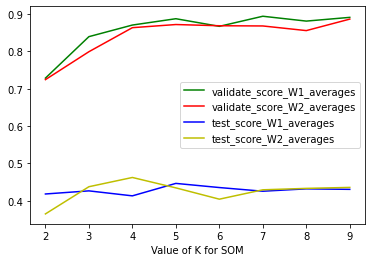

In [8]:
som = newSom.SOM(m=6, n=6, dim=28)  # dim = i-1, as the first feature is the class label
optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num =10,subset_percentage = 0.1)
optimize_W1.runOptimize()

k number :2

validate_score_W1_average : 0.7590064627680477
validate_score_W2_average : 0.7366240651959688
test_score_W1_average : 0.3833333333333333
test_score_W2_average : 0.39166666666666666
k number :3

validate_score_W1_average : 0.8059191804211725
validate_score_W2_average : 0.8135078732688296
test_score_W1_average : 0.4033333333333333
test_score_W2_average : 0.3988888888888889
k number :4

validate_score_W1_average : 0.8366670217942774
validate_score_W2_average : 0.8553506333269026
test_score_W1_average : 0.3958333333333333
test_score_W2_average : 0.4058333333333333
k number :5

validate_score_W1_average : 0.8466793168880455
validate_score_W2_average : 0.8291271347248577
test_score_W1_average : 0.386
test_score_W2_average : 0.3993333333333333
k number :6

validate_score_W1_average : 0.8270172374824382
validate_score_W2_average : 0.853969251532756
test_score_W1_average : 0.39833333333333326
test_score_W2_average : 0.3994444444444445
k number :7

validate_score_W1_average : 0.8690

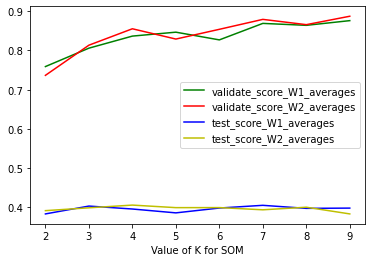

In [7]:
global keepFeatureColumns1 
keepFeatureColumns1 = [1,3,11,17,20,21,22,23]
som = newSom.SOM(m=6, n=6, dim=len(keepFeatureColumns1))  # dim = i-1, as the first feature is the class label
optimize_W2 = optimizeW_Kfolder_CM.OptimizeW(som,originalfeatureNum = 28,X = csv_training,Y = csv_test,classNum =6,k_folder_num =10,subset_percentage = 0.1,keepFeatureColumns = keepFeatureColumns1)
optimize_W2.runOptimize()

feature number :1
k number :2

validate_score_W1_average : 0.7639388252323462
validate_score_W2_average : 0.7589120539303873
test_score_W1_average : 0.4066666666666667
test_score_W2_average : 0.4083333333333333
k number :3

validate_score_W1_average : 0.8392145702902675
validate_score_W2_average : 0.8530639347372415
test_score_W1_average : 0.39666666666666667
test_score_W2_average : 0.41222222222222227
k number :4

validate_score_W1_average : 0.8686315301488944
validate_score_W2_average : 0.8751751402994014
test_score_W1_average : 0.3883333333333333
test_score_W2_average : 0.39916666666666667
k number :5

validate_score_W1_average : 0.8767552182163187
validate_score_W2_average : 0.8828273244781784
test_score_W1_average : 0.39266666666666666
test_score_W2_average : 0.414
k number :6

validate_score_W1_average : 0.8547301195478417
validate_score_W2_average : 0.8627011100840157
test_score_W1_average : 0.38833333333333336
test_score_W2_average : 0.40499999999999997
k number :7

validate_sc

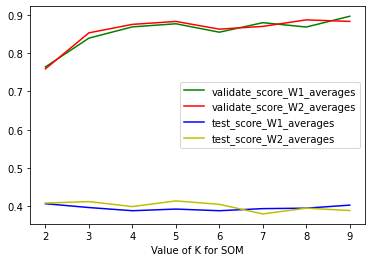

feature number :2
k number :2

validate_score_W1_average : 0.7782591183067427
validate_score_W2_average : 0.7823372670169096
test_score_W1_average : 0.42333333333333334
test_score_W2_average : 0.44
k number :3

validate_score_W1_average : 0.8538228040220073
validate_score_W2_average : 0.8360842344906091
test_score_W1_average : 0.4444444444444444
test_score_W2_average : 0.4222222222222222
k number :4

validate_score_W1_average : 0.8748918060542539
validate_score_W2_average : 0.885704326030182
test_score_W1_average : 0.35
test_score_W2_average : 0.39916666666666667
k number :5

validate_score_W1_average : 0.8256166982922201
validate_score_W2_average : 0.853605313092979
test_score_W1_average : 0.3786666666666667
test_score_W2_average : 0.37
k number :6

validate_score_W1_average : 0.8550094015952676
validate_score_W2_average : 0.8639342726717599
test_score_W1_average : 0.35888888888888887
test_score_W2_average : 0.3772222222222222
k number :7

validate_score_W1_average : 0.873322025928874

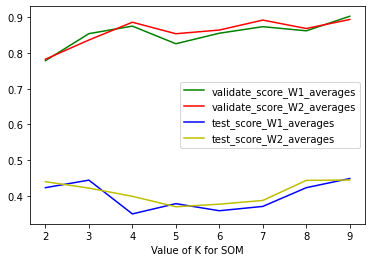

feature number :3
k number :2

validate_score_W1_average : 0.7719047935722966
validate_score_W2_average : 0.780250772327987
test_score_W1_average : 0.43833333333333335
test_score_W2_average : 0.425
k number :3

validate_score_W1_average : 0.867103016505407
validate_score_W2_average : 0.8518307721494973
test_score_W1_average : 0.46555555555555556
test_score_W2_average : 0.4666666666666666
k number :4

validate_score_W1_average : 0.8530744573026234
validate_score_W2_average : 0.8783981033306171
test_score_W1_average : 0.45333333333333337
test_score_W2_average : 0.4741666666666667
k number :5

validate_score_W1_average : 0.8666982922201137
validate_score_W2_average : 0.8362428842504744
test_score_W1_average : 0.44333333333333336
test_score_W2_average : 0.43933333333333335
k number :6

validate_score_W1_average : 0.8544369544276522
validate_score_W2_average : 0.8566231872596392
test_score_W1_average : 0.42444444444444446
test_score_W2_average : 0.4383333333333333
k number :7

validate_scor

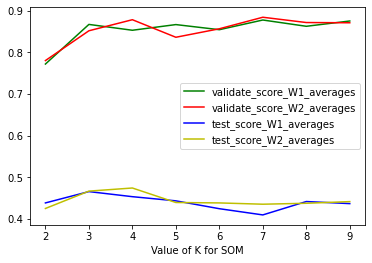

feature number :4
k number :2

validate_score_W1_average : 0.7239154157270765
validate_score_W2_average : 0.7315026691413405
test_score_W1_average : 0.43166666666666664
test_score_W2_average : 0.43666666666666665
k number :3

validate_score_W1_average : 0.8483210017074558
validate_score_W2_average : 0.8547713906279643
test_score_W1_average : 0.4433333333333333
test_score_W2_average : 0.44111111111111106
k number :4

validate_score_W1_average : 0.8508931219460225
validate_score_W2_average : 0.8844692737832319
test_score_W1_average : 0.4008333333333333
test_score_W2_average : 0.44166666666666665
k number :5

validate_score_W1_average : 0.8722960151802657
validate_score_W2_average : 0.8632827324478178
test_score_W1_average : 0.434
test_score_W2_average : 0.43200000000000005
k number :6

validate_score_W1_average : 0.8335662124254907
validate_score_W2_average : 0.8577648404105673
test_score_W1_average : 0.4572222222222222
test_score_W2_average : 0.4266666666666667
k number :7

validate_sco

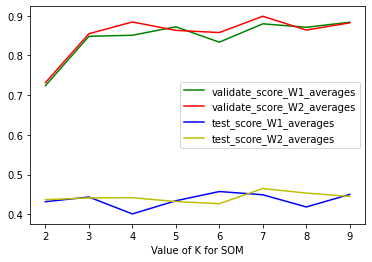

feature number :5
k number :2

validate_score_W1_average : 0.7508501653477139
validate_score_W2_average : 0.7592909847710826
test_score_W1_average : 0.38666666666666666
test_score_W2_average : 0.44166666666666665
k number :3

validate_score_W1_average : 0.8328590400303547
validate_score_W2_average : 0.8221400113830392
test_score_W1_average : 0.42444444444444446
test_score_W2_average : 0.4022222222222222
k number :4

validate_score_W1_average : 0.850418918607631
validate_score_W2_average : 0.8537383419763716
test_score_W1_average : 0.42416666666666664
test_score_W2_average : 0.3983333333333333
k number :5

validate_score_W1_average : 0.8400379506641367
validate_score_W2_average : 0.8415559772296015
test_score_W1_average : 0.45599999999999996
test_score_W2_average : 0.46333333333333326
k number :6

validate_score_W1_average : 0.8625096101114579
validate_score_W2_average : 0.8366954138106432
test_score_W1_average : 0.44111111111111106
test_score_W2_average : 0.4461111111111111
k number :7

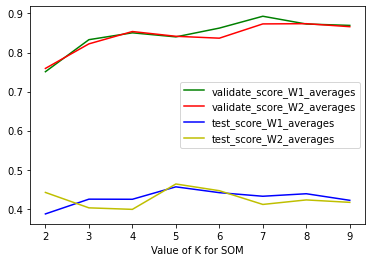

feature number :6
k number :2

validate_score_W1_average : 0.7851824870472586
validate_score_W2_average : 0.7245793004008246
test_score_W1_average : 0.44
test_score_W2_average : 0.43166666666666664
k number :3

validate_score_W1_average : 0.831815594763802
validate_score_W2_average : 0.8341870612786947
test_score_W1_average : 0.42
test_score_W2_average : 0.4377777777777778
k number :4

validate_score_W1_average : 0.8507982812783441
validate_score_W2_average : 0.8620868762111531
test_score_W1_average : 0.425
test_score_W2_average : 0.44999999999999996
k number :5

validate_score_W1_average : 0.8559772296015181
validate_score_W2_average : 0.8473434535104364
test_score_W1_average : 0.41400000000000003
test_score_W2_average : 0.42266666666666663
k number :6

validate_score_W1_average : 0.8501727983391306
validate_score_W2_average : 0.8571994698286797
test_score_W1_average : 0.40444444444444444
test_score_W2_average : 0.445
k number :7

validate_score_W1_average : 0.8716109143555505
validat

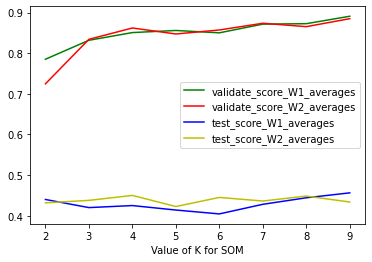

feature number :7
k number :2

validate_score_W1_average : 0.7342530485040113
validate_score_W2_average : 0.7247689817361812
test_score_W1_average : 0.4633333333333333
test_score_W2_average : 0.45
k number :3

validate_score_W1_average : 0.8222348700436349
validate_score_W2_average : 0.8188199582621895
test_score_W1_average : 0.43555555555555553
test_score_W2_average : 0.4377777777777778
k number :4

validate_score_W1_average : 0.8808669840739664
validate_score_W2_average : 0.8462459292297857
test_score_W1_average : 0.4708333333333333
test_score_W2_average : 0.4033333333333333
k number :5

validate_score_W1_average : 0.8418406072106261
validate_score_W2_average : 0.8662239089184061
test_score_W1_average : 0.462
test_score_W2_average : 0.44733333333333325
k number :6

validate_score_W1_average : 0.852829597112148
validate_score_W2_average : 0.8580517932608432
test_score_W1_average : 0.44611111111111107
test_score_W2_average : 0.4472222222222222
k number :7

validate_score_W1_average : 0

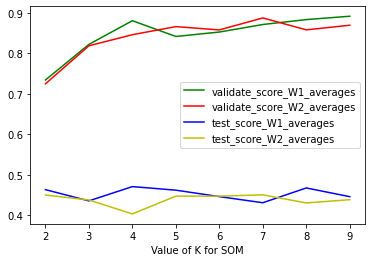

feature number :8
k number :2

validate_score_W1_average : 0.7194579043461964
validate_score_W2_average : 0.7169920469865606
test_score_W1_average : 0.5
test_score_W2_average : 0.43333333333333335
k number :3

validate_score_W1_average : 0.8307721494972492
validate_score_W2_average : 0.8282109656611648
test_score_W1_average : 0.4144444444444444
test_score_W2_average : 0.46444444444444444
k number :4

validate_score_W1_average : 0.8613255953906356
validate_score_W2_average : 0.8628432980221312
test_score_W1_average : 0.445
test_score_W2_average : 0.4116666666666667
k number :5

validate_score_W1_average : 0.8736242884250475
validate_score_W2_average : 0.8641366223908917
test_score_W1_average : 0.434
test_score_W2_average : 0.44466666666666665
k number :6

validate_score_W1_average : 0.8639293568755674
validate_score_W2_average : 0.8384994029738514
test_score_W1_average : 0.45
test_score_W2_average : 0.4305555555555556
k number :7

validate_score_W1_average : 0.8867969350252841
validate_

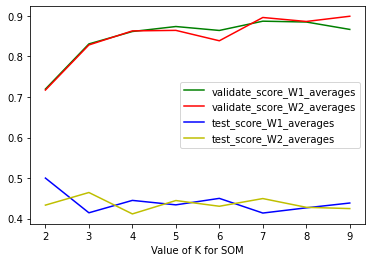

feature number :9
k number :2

validate_score_W1_average : 0.7339685265009763
validate_score_W2_average : 0.7209753550290492
test_score_W1_average : 0.4683333333333333
test_score_W2_average : 0.3833333333333333
k number :3

validate_score_W1_average : 0.8292544109277177
validate_score_W2_average : 0.8426294820717132
test_score_W1_average : 0.3944444444444444
test_score_W2_average : 0.46444444444444444
k number :4

validate_score_W1_average : 0.8381844724771302
validate_score_W2_average : 0.8603791683103317
test_score_W1_average : 0.455
test_score_W2_average : 0.42666666666666664
k number :5

validate_score_W1_average : 0.8336812144212523
validate_score_W2_average : 0.8584440227703984
test_score_W1_average : 0.44400000000000006
test_score_W2_average : 0.4653333333333333
k number :6

validate_score_W1_average : 0.8645925572036618
validate_score_W2_average : 0.8449556800458433
test_score_W1_average : 0.44722222222222224
test_score_W2_average : 0.4305555555555556
k number :7

validate_scor

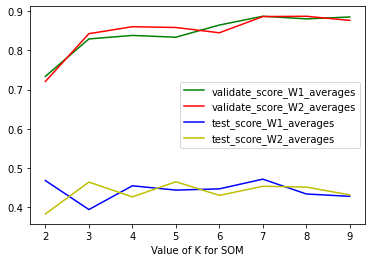

feature number :10
k number :2

validate_score_W1_average : 0.7514192093537837
validate_score_W2_average : 0.7694389362126608
test_score_W1_average : 0.38
test_score_W2_average : 0.44
k number :3

validate_score_W1_average : 0.8247011952191236
validate_score_W2_average : 0.8210017074558907
test_score_W1_average : 0.45
test_score_W2_average : 0.4777777777777778
k number :4

validate_score_W1_average : 0.8767866038186776
validate_score_W2_average : 0.8701457774847174
test_score_W1_average : 0.4275
test_score_W2_average : 0.4666666666666667
k number :5

validate_score_W1_average : 0.8725806451612902
validate_score_W2_average : 0.8496204933586338
test_score_W1_average : 0.43600000000000005
test_score_W2_average : 0.454
k number :6

validate_score_W1_average : 0.8615570260448605
validate_score_W2_average : 0.8470391673354309
test_score_W1_average : 0.43
test_score_W2_average : 0.42944444444444435
k number :7

validate_score_W1_average : 0.8843400642013499
validate_score_W2_average : 0.88139

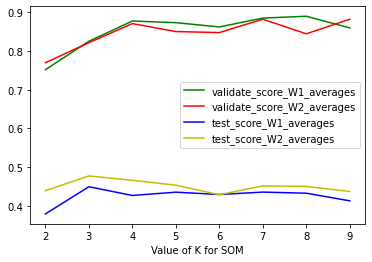

feature number :11
k number :2

validate_score_W1_average : 0.7203114703553011
validate_score_W2_average : 0.7595755067741174
test_score_W1_average : 0.44666666666666666
test_score_W2_average : 0.45999999999999996
k number :3

validate_score_W1_average : 0.8524947827736673
validate_score_W2_average : 0.8439575033200531
test_score_W1_average : 0.4455555555555555
test_score_W2_average : 0.4577777777777778
k number :4

validate_score_W1_average : 0.8390384703981941
validate_score_W2_average : 0.8366670217942774
test_score_W1_average : 0.41833333333333333
test_score_W2_average : 0.38583333333333336
k number :5

validate_score_W1_average : 0.8697343453510437
validate_score_W2_average : 0.859392789373814
test_score_W1_average : 0.446
test_score_W2_average : 0.44066666666666665
k number :6

validate_score_W1_average : 0.8523516844866981
validate_score_W2_average : 0.8568165779230407
test_score_W1_average : 0.4266666666666667
test_score_W2_average : 0.4477777777777778
k number :7

validate_sco

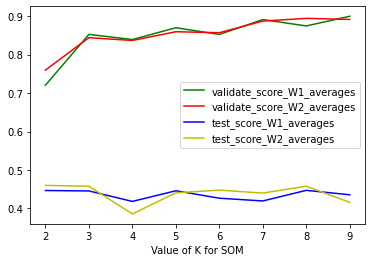

feature number :12
k number :2

validate_score_W1_average : 0.7497120773355743
validate_score_W2_average : 0.7703873428894438
test_score_W1_average : 0.42666666666666664
test_score_W2_average : 0.395
k number :3

validate_score_W1_average : 0.8152153291595523
validate_score_W2_average : 0.840068298235629
test_score_W1_average : 0.4166666666666667
test_score_W2_average : 0.45555555555555555
k number :4

validate_score_W1_average : 0.870337834335849
validate_score_W2_average : 0.8654985847684807
test_score_W1_average : 0.41250000000000003
test_score_W2_average : 0.41000000000000003
k number :5

validate_score_W1_average : 0.8293168880455408
validate_score_W2_average : 0.8521821631878558
test_score_W1_average : 0.40066666666666667
test_score_W2_average : 0.45200000000000007
k number :6

validate_score_W1_average : 0.8461871680216978
validate_score_W2_average : 0.8467557797878883
test_score_W1_average : 0.44388888888888883
test_score_W2_average : 0.43722222222222223
k number :7

validate_s

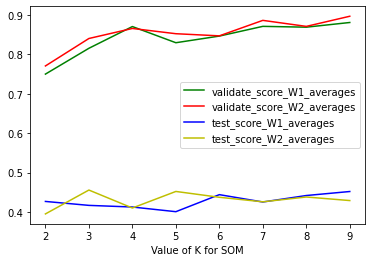

feature number :13
k number :2

validate_score_W1_average : 0.7684910873163175
validate_score_W2_average : 0.7570148087468034
test_score_W1_average : 0.47
test_score_W2_average : 0.4716666666666667
k number :3

validate_score_W1_average : 0.8441472206412445
validate_score_W2_average : 0.8234680326313791
test_score_W1_average : 0.45555555555555555
test_score_W2_average : 0.41111111111111115
k number :4

validate_score_W1_average : 0.857060428802193
validate_score_W2_average : 0.8667339249567367
test_score_W1_average : 0.42416666666666664
test_score_W2_average : 0.44
k number :5

validate_score_W1_average : 0.8664136622390892
validate_score_W2_average : 0.854079696394687
test_score_W1_average : 0.4739999999999999
test_score_W2_average : 0.44733333333333336
k number :6

validate_score_W1_average : 0.869821019642009
validate_score_W2_average : 0.8608952842497025
test_score_W1_average : 0.4305555555555556
test_score_W2_average : 0.4483333333333333
k number :7

validate_score_W1_average : 0.

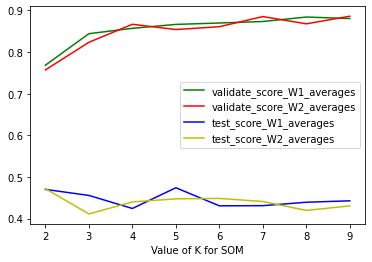

feature number :14
k number :2

validate_score_W1_average : 0.7450648846193375
validate_score_W2_average : 0.7482894673203997
test_score_W1_average : 0.45166666666666666
test_score_W2_average : 0.42333333333333334
k number :3

validate_score_W1_average : 0.8102826788085752
validate_score_W2_average : 0.8342819199392905
test_score_W1_average : 0.4611111111111111
test_score_W2_average : 0.4911111111111112
k number :4

validate_score_W1_average : 0.8631334348806339
validate_score_W2_average : 0.876691583187683
test_score_W1_average : 0.42583333333333334
test_score_W2_average : 0.435
k number :5

validate_score_W1_average : 0.844212523719165
validate_score_W2_average : 0.8585388994307401
test_score_W1_average : 0.426
test_score_W2_average : 0.41466666666666663
k number :6

validate_score_W1_average : 0.862984983809204
validate_score_W2_average : 0.8558674511196994
test_score_W1_average : 0.4461111111111111
test_score_W2_average : 0.4294444444444445
k number :7

validate_score_W1_average : 

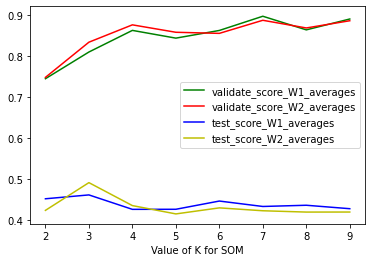

feature number :15
k number :2

validate_score_W1_average : 0.7404176919031008
validate_score_W2_average : 0.7548334733902025
test_score_W1_average : 0.43
test_score_W2_average : 0.44166666666666665
k number :3

validate_score_W1_average : 0.8378865490419276
validate_score_W2_average : 0.8121798520204896
test_score_W1_average : 0.4566666666666666
test_score_W2_average : 0.4322222222222223
k number :4

validate_score_W1_average : 0.8548826567192543
validate_score_W2_average : 0.865877947439194
test_score_W1_average : 0.44999999999999996
test_score_W2_average : 0.43833333333333335
k number :5

validate_score_W1_average : 0.8710626185958255
validate_score_W2_average : 0.8529411764705882
test_score_W1_average : 0.40199999999999997
test_score_W2_average : 0.4213333333333333
k number :6

validate_score_W1_average : 0.8480756980754712
validate_score_W2_average : 0.859942376064675
test_score_W1_average : 0.4255555555555555
test_score_W2_average : 0.445
k number :7

validate_score_W1_average : 

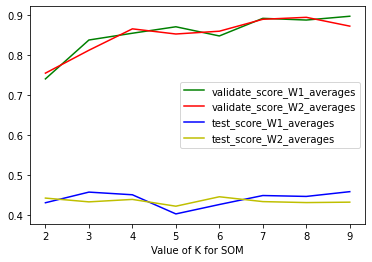

feature number :16
k number :2

validate_score_W1_average : 0.7498069180032525
validate_score_W2_average : 0.7248638224038595
test_score_W1_average : 0.435
test_score_W2_average : 0.375
k number :3

validate_score_W1_average : 0.8229937393284007
validate_score_W2_average : 0.8434832100170745
test_score_W1_average : 0.41444444444444445
test_score_W2_average : 0.43333333333333335
k number :4

validate_score_W1_average : 0.8498501625428672
validate_score_W2_average : 0.8519363692904838
test_score_W1_average : 0.44833333333333336
test_score_W2_average : 0.43083333333333335
k number :5

validate_score_W1_average : 0.8495256166982921
validate_score_W2_average : 0.8811195445920303
test_score_W1_average : 0.44800000000000006
test_score_W2_average : 0.44000000000000006
k number :6

validate_score_W1_average : 0.8572869818048557
validate_score_W2_average : 0.8780731288967139
test_score_W1_average : 0.4305555555555555
test_score_W2_average : 0.4038888888888889
k number :7

validate_score_W1_avera

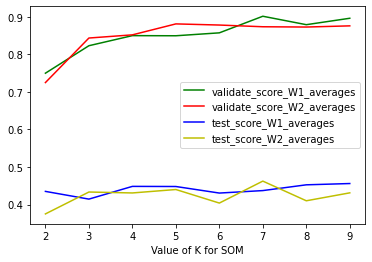

feature number :17
k number :2

validate_score_W1_average : 0.7323562351504453
validate_score_W2_average : 0.7143365082915683
test_score_W1_average : 0.3733333333333333
test_score_W2_average : 0.425
k number :3

validate_score_W1_average : 0.8180610889774237
validate_score_W2_average : 0.8006070954278126
test_score_W1_average : 0.3988888888888889
test_score_W2_average : 0.4177777777777778
k number :4

validate_score_W1_average : 0.852509840394134
validate_score_W2_average : 0.8633172494118798
test_score_W1_average : 0.41500000000000004
test_score_W2_average : 0.4375
k number :5

validate_score_W1_average : 0.8481973434535105
validate_score_W2_average : 0.8783681214421252
test_score_W1_average : 0.43066666666666664
test_score_W2_average : 0.4373333333333333
k number :6

validate_score_W1_average : 0.8520710519458126
validate_score_W2_average : 0.8582435093123547
test_score_W1_average : 0.42944444444444446
test_score_W2_average : 0.4138888888888889
k number :7

validate_score_W1_average 

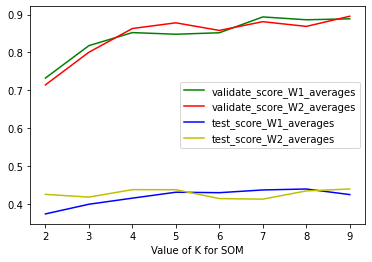

feature number :18
k number :2

validate_score_W1_average : 0.7480049453173648
validate_score_W2_average : 0.7411764172445272
test_score_W1_average : 0.3716666666666667
test_score_W2_average : 0.39666666666666667
k number :3

validate_score_W1_average : 0.829823562891292
validate_score_W2_average : 0.8458546765319674
test_score_W1_average : 0.4000000000000001
test_score_W2_average : 0.43
k number :4

validate_score_W1_average : 0.8720425908382835
validate_score_W2_average : 0.882668956759854
test_score_W1_average : 0.4441666666666667
test_score_W2_average : 0.4358333333333333
k number :5

validate_score_W1_average : 0.8800759013282733
validate_score_W2_average : 0.8396584440227703
test_score_W1_average : 0.42000000000000004
test_score_W2_average : 0.42400000000000004
k number :6

validate_score_W1_average : 0.8631622765905681
validate_score_W2_average : 0.8479892664940628
test_score_W1_average : 0.4366666666666667
test_score_W2_average : 0.43
k number :7

validate_score_W1_average : 0.

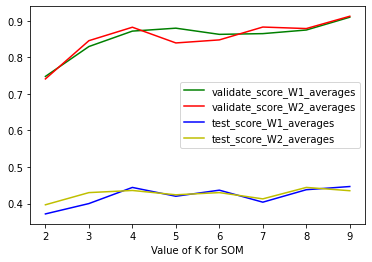

feature number :19
k number :2

validate_score_W1_average : 0.7208805143613709
validate_score_W2_average : 0.7457287692930856
test_score_W1_average : 0.44666666666666666
test_score_W2_average : 0.4766666666666667
k number :3

validate_score_W1_average : 0.7990893568582812
validate_score_W2_average : 0.85486624928856
test_score_W1_average : 0.41
test_score_W2_average : 0.46444444444444444
k number :4

validate_score_W1_average : 0.865593425436159
validate_score_W2_average : 0.8611392973656249
test_score_W1_average : 0.42166666666666663
test_score_W2_average : 0.425
k number :5

validate_score_W1_average : 0.8762808349146111
validate_score_W2_average : 0.8286527514231498
test_score_W1_average : 0.43600000000000005
test_score_W2_average : 0.426
k number :6

validate_score_W1_average : 0.8558638858169664
validate_score_W2_average : 0.8642095032388074
test_score_W1_average : 0.43999999999999995
test_score_W2_average : 0.43555555555555553
k number :7

validate_score_W1_average : 0.8882225251

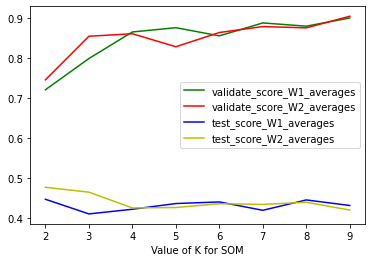

feature number :20
k number :2

validate_score_W1_average : 0.779966250324952
validate_score_W2_average : 0.7309336251352707
test_score_W1_average : 0.42
test_score_W2_average : 0.41
k number :3

validate_score_W1_average : 0.8019351166761526
validate_score_W2_average : 0.813982166571808
test_score_W1_average : 0.42333333333333334
test_score_W2_average : 0.41222222222222227
k number :4

validate_score_W1_average : 0.8497550339338829
validate_score_W2_average : 0.8470085777715071
test_score_W1_average : 0.41333333333333333
test_score_W2_average : 0.41000000000000003
k number :5

validate_score_W1_average : 0.8310246679316888
validate_score_W2_average : 0.864516129032258
test_score_W1_average : 0.43
test_score_W2_average : 0.40199999999999997
k number :6

validate_score_W1_average : 0.863455495730496
validate_score_W2_average : 0.8577593303972525
test_score_W1_average : 0.43444444444444447
test_score_W2_average : 0.44333333333333336
k number :7

validate_score_W1_average : 0.879017642450

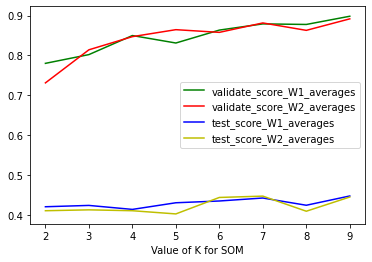

feature number :21
k number :2

validate_score_W1_average : 0.760334232115544
validate_score_W2_average : 0.7498069180032525
test_score_W1_average : 0.42833333333333334
test_score_W2_average : 0.41000000000000003
k number :3

validate_score_W1_average : 0.8064883323847467
validate_score_W2_average : 0.8124644280022766
test_score_W1_average : 0.4488888888888889
test_score_W2_average : 0.4266666666666667
k number :4

validate_score_W1_average : 0.8749884103624317
validate_score_W2_average : 0.877454051766088
test_score_W1_average : 0.4341666666666667
test_score_W2_average : 0.42000000000000004
k number :5

validate_score_W1_average : 0.8547438330170778
validate_score_W2_average : 0.8588235294117647
test_score_W1_average : 0.4253333333333334
test_score_W2_average : 0.41866666666666674
k number :6

validate_score_W1_average : 0.8567195044531711
validate_score_W2_average : 0.8563322369487233
test_score_W1_average : 0.43555555555555553
test_score_W2_average : 0.42333333333333334
k number :7


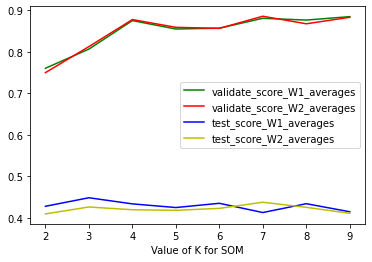

feature number :22
k number :2

validate_score_W1_average : 0.7163281623128125
validate_score_W2_average : 0.7763623049531767
test_score_W1_average : 0.375
test_score_W2_average : 0.3816666666666667
k number :3

validate_score_W1_average : 0.8247011952191236
validate_score_W2_average : 0.8320053120849934
test_score_W1_average : 0.4277777777777778
test_score_W2_average : 0.4366666666666667
k number :4

validate_score_W1_average : 0.8654998085190315
validate_score_W2_average : 0.8600054204950863
test_score_W1_average : 0.45666666666666667
test_score_W2_average : 0.4341666666666667
k number :5

validate_score_W1_average : 0.8536053130929793
validate_score_W2_average : 0.8896584440227704
test_score_W1_average : 0.4253333333333334
test_score_W2_average : 0.42666666666666664
k number :6

validate_score_W1_average : 0.8431496381325765
validate_score_W2_average : 0.8791174924988191
test_score_W1_average : 0.4155555555555555
test_score_W2_average : 0.42555555555555563
k number :7

validate_scor

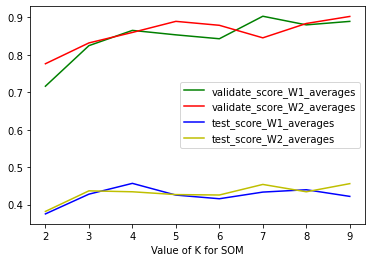

feature number :23
k number :2

validate_score_W1_average : 0.705421485529808
validate_score_W2_average : 0.7268554764251038
test_score_W1_average : 0.43833333333333335
test_score_W2_average : 0.41833333333333333
k number :3

validate_score_W1_average : 0.8351356478846519
validate_score_W2_average : 0.8527793587554543
test_score_W1_average : 0.42555555555555563
test_score_W2_average : 0.42444444444444446
k number :4

validate_score_W1_average : 0.8894030400843093
validate_score_W2_average : 0.8624636834027751
test_score_W1_average : 0.44583333333333336
test_score_W2_average : 0.4008333333333333
k number :5

validate_score_W1_average : 0.8386148007590132
validate_score_W2_average : 0.8610056925996205
test_score_W1_average : 0.4126666666666667
test_score_W2_average : 0.45200000000000007
k number :6

validate_score_W1_average : 0.8551949053768655
validate_score_W2_average : 0.877308695578895
test_score_W1_average : 0.42333333333333334
test_score_W2_average : 0.43722222222222223
k number :

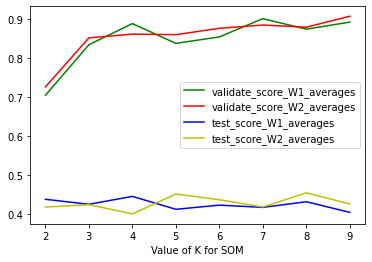

feature number :24
k number :2

validate_score_W1_average : 0.7382363565464999
validate_score_W2_average : 0.7659298315085636
test_score_W1_average : 0.3983333333333333
test_score_W2_average : 0.4
k number :3

validate_score_W1_average : 0.8323847467273762
validate_score_W2_average : 0.8489850123316259
test_score_W1_average : 0.3855555555555556
test_score_W2_average : 0.4222222222222222
k number :4

validate_score_W1_average : 0.8743187668625627
validate_score_W2_average : 0.8855129890323157
test_score_W1_average : 0.4291666666666667
test_score_W2_average : 0.42
k number :5

validate_score_W1_average : 0.8860531309297913
validate_score_W2_average : 0.8679316888045541
test_score_W1_average : 0.42266666666666663
test_score_W2_average : 0.43066666666666664
k number :6

validate_score_W1_average : 0.8664880017839479
validate_score_W2_average : 0.8634525246448851
test_score_W1_average : 0.43555555555555553
test_score_W2_average : 0.4305555555555555
k number :7

validate_score_W1_average : 0

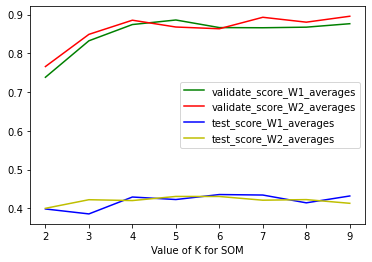

feature number :25
k number :2

validate_score_W1_average : 0.7085512275631919
validate_score_W2_average : 0.7055163261974863
test_score_W1_average : 0.3983333333333333
test_score_W2_average : 0.42500000000000004
k number :3

validate_score_W1_average : 0.7968127490039841
validate_score_W2_average : 0.8115158413963194
test_score_W1_average : 0.4144444444444444
test_score_W2_average : 0.4144444444444444
k number :4

validate_score_W1_average : 0.8543106253221343
validate_score_W2_average : 0.8553506333269026
test_score_W1_average : 0.4216666666666667
test_score_W2_average : 0.4041666666666667
k number :5

validate_score_W1_average : 0.8382352941176471
validate_score_W2_average : 0.8637571157495255
test_score_W1_average : 0.4213333333333333
test_score_W2_average : 0.42733333333333334
k number :6

validate_score_W1_average : 0.8344128097653858
validate_score_W2_average : 0.8461789570214641
test_score_W1_average : 0.4077777777777778
test_score_W2_average : 0.4294444444444445
k number :7

v

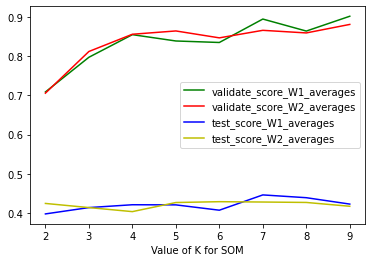

feature number :26
k number :2

validate_score_W1_average : 0.7719047935722966
validate_score_W2_average : 0.7252431850745727
test_score_W1_average : 0.43833333333333335
test_score_W2_average : 0.42333333333333334
k number :3

validate_score_W1_average : 0.8384557010055018
validate_score_W2_average : 0.8265983684310377
test_score_W1_average : 0.38999999999999996
test_score_W2_average : 0.4477777777777778
k number :4

validate_score_W1_average : 0.8367618624619557
validate_score_W2_average : 0.8761207395484504
test_score_W1_average : 0.39916666666666667
test_score_W2_average : 0.4391666666666667
k number :5

validate_score_W1_average : 0.8439278937381405
validate_score_W2_average : 0.8536053130929793
test_score_W1_average : 0.4206666666666667
test_score_W2_average : 0.43
k number :6

validate_score_W1_average : 0.8416323317209521
validate_score_W2_average : 0.8405897507702135
test_score_W1_average : 0.44388888888888894
test_score_W2_average : 0.43777777777777777
k number :7

validate_sc

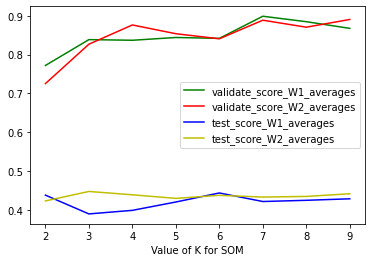

feature number :27
k number :2

validate_score_W1_average : 0.7228721683826153
validate_score_W2_average : 0.7320717131474104
test_score_W1_average : 0.44833333333333336
test_score_W2_average : 0.3766666666666667
k number :3

validate_score_W1_average : 0.8181559476380195
validate_score_W2_average : 0.8117055587175109
test_score_W1_average : 0.4266666666666667
test_score_W2_average : 0.4666666666666666
k number :4

validate_score_W1_average : 0.8509879626137008
validate_score_W2_average : 0.8450161679043344
test_score_W1_average : 0.45333333333333337
test_score_W2_average : 0.43666666666666665
k number :5

validate_score_W1_average : 0.8591081593927894
validate_score_W2_average : 0.8758064516129032
test_score_W1_average : 0.40066666666666667
test_score_W2_average : 0.41466666666666663
k number :6

validate_score_W1_average : 0.8570037563165279
validate_score_W2_average : 0.8614611410092357
test_score_W1_average : 0.42555555555555563
test_score_W2_average : 0.43611111111111106
k number 

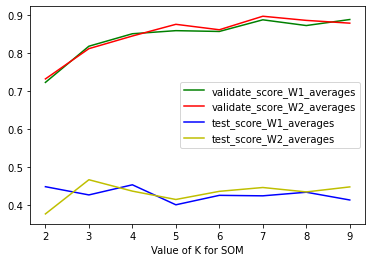

feature number :28
k number :2

validate_score_W1_average : 0.7734222442551494
validate_score_W2_average : 0.7314078284736623
test_score_W1_average : 0.3916666666666667
test_score_W2_average : 0.4
k number :3

validate_score_W1_average : 0.8107569721115538
validate_score_W2_average : 0.8297287042306962
test_score_W1_average : 0.44111111111111106
test_score_W2_average : 0.43333333333333335
k number :4

validate_score_W1_average : 0.8516518472874489
validate_score_W2_average : 0.8599085642382657
test_score_W1_average : 0.39666666666666667
test_score_W2_average : 0.46166666666666667
k number :5

validate_score_W1_average : 0.8582542694497153
validate_score_W2_average : 0.8749525616698293
test_score_W1_average : 0.44866666666666666
test_score_W2_average : 0.44266666666666665
k number :6

validate_score_W1_average : 0.8585234395966411
validate_score_W2_average : 0.85700802387586
test_score_W1_average : 0.4483333333333333
test_score_W2_average : 0.4405555555555556
k number :7

validate_score

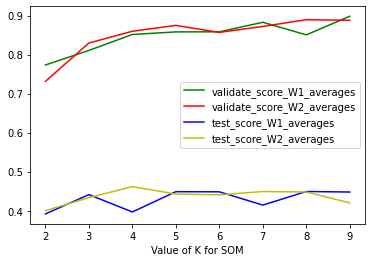

In [6]:
# as the first feature is the label, so sart from second feature , i starts from 2
for i in range(2,30):
    som = newSom.SOM(m=6, n=6, dim=i-1)  # dim = i-1, as the first feature is the class label
    optimize_W1 = optimizeW_Kfolder_CM.OptimizeW(som,i-1,csv_training,Y = csv_test,classNum =6,k_folder_num =10,subset_percentage = 0.1)
    print("feature number :{}".format(i-1))
    optimize_W1.runOptimize()